# Regresión Logística Detección de FRAUDES

En este ejercicio se muestran los elementos de la regresión logística planteando uno de los primeros problemas que fueron solucionados mediante uso de técnicas de Machine Learning: La Detección de FRAUDES.



# Carga de Datos.

#### Funciones auxiliares para el procesamiento del DataSet

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Cargar el dataset
data = pd.read_csv("/home/emilio/Documentos/Zamora/Simulacion/ProyectoEmilio/notebooks/dataset/creditcard.csv")

##### Parsing del correo electronico

In [3]:
# Mostrar información básica del dataset
print("Dimensiones del dataset:", data.shape)
print(data.head())

Dimensiones del dataset: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.20601

# 2. Análisis Exploratorio de los Datos

In [4]:
# Verificar valores nulos
print("Valores nulos en el dataset:\n", data.isnull().sum())

Valores nulos en el dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


/tmp/ipykernel_8649/1602509760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


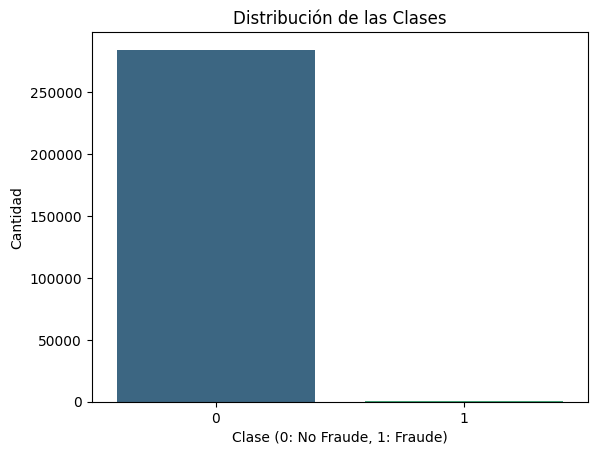

In [5]:
# Ver distribución de las clases (Fraude vs. No Fraude)
class_counts = data['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribución de las Clases")
plt.xlabel("Clase (0: No Fraude, 1: Fraude)")
plt.ylabel("Cantidad")
plt.show()

# 3. Preparación de los Datos

In [6]:
# Separar las características y la variable objetivo
X = data.drop(columns=['Class'])
y = data['Class']

In [7]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Verificar las dimensiones de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)

Tamaño de X_train: (199364, 30)
Tamaño de y_train: (199364,)


# 4. Entrenamiento del Modelo

In [9]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [10]:
# Ver coeficientes
print("Coeficientes del modelo:", model.coef_)

Coeficientes del modelo: [[-9.11794980e-05  1.83858541e-01 -3.58994873e-01 -8.50737713e-01
   1.68730012e-01 -4.21288307e-02 -8.36185375e-02  6.17743153e-02
  -1.48588254e-01 -4.00002283e-01 -2.49689424e-01 -1.48920540e-01
  -6.14060002e-02 -2.80980555e-01 -7.82794746e-01 -2.57412795e-01
  -2.99998969e-01 -5.16098947e-01 -2.53382555e-02  3.94488711e-02
   5.22161495e-02  1.73599770e-01  2.15977754e-01  3.85426578e-02
  -3.22239393e-02 -1.89111234e-01  3.40731436e-02 -5.51758677e-02
   4.52826647e-02 -6.60763361e-03]]


# 5. Evaluación del Modelo


In [11]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [12]:
# Evaluar el modelo
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.65      0.69       148

    accuracy                           1.00     85443
   macro avg       0.87      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Matriz de confusión:
 [[85261    34]
 [   52    96]]
Precisión del modelo: 0.9989934810341398


# 6. Visualización de Resultados


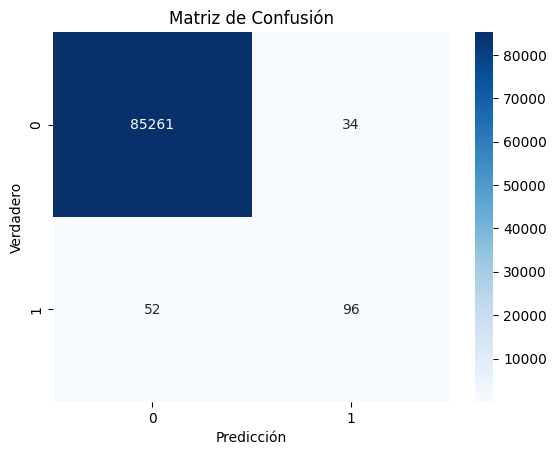

In [13]:
# Matriz de confusión como heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# 7.- Guardar el modelo

In [14]:
# Guardar el modelo
joblib.dump(model, "logistic_regression_fraud.pkl")
print("Modelo guardado como 'logistic_regression_fraud.pkl'")

Modelo guardado como 'logistic_regression_fraud.pkl'
